Project Using the Students Performance DataSet from Kaggle, for more information read the README file

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
students_performance = pd.read_csv("StudentsPerformance.csv")
print(students_performance.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


First we are going to see with what type of data we are working with

In [7]:
print(students_performance.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

In [8]:
print(students_performance.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


After checking waht type of information with and also checking that the type of data will not be an inconvinient we initiate the EDA

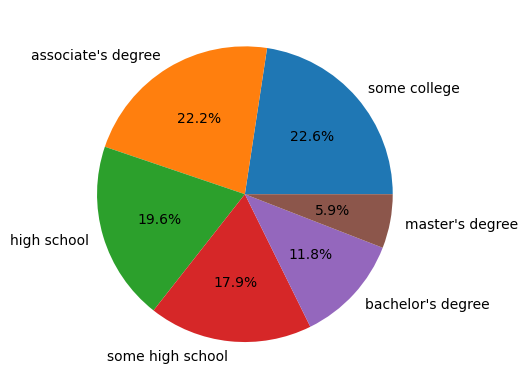

In [11]:
students_performance['parental level of education'].value_counts().plot.pie(
    autopct='%1.1f%%', ylabel='', legend=False
)
plt.show()
plt.close()

After seeing this we know we have different types of parental groups in the class, so know we are going to take the mean of grades per parental group from each group

In [90]:
def parental_level_of_education_mean_grades(df):
    """
    Calculate the mean grades for each parental level of education.
    """
    numeric_cols = ['math score', 'reading score', 'writing score']
    return df.groupby('parental level of education')[numeric_cols].mean().reset_index()

mean_grades = parental_level_of_education_mean_grades(students_performance)
print(mean_grades)

  parental level of education  math score  reading score  writing score
0          associate's degree   67.882883      70.927928      69.896396
1           bachelor's degree   69.389831      73.000000      73.381356
2                 high school   62.137755      64.704082      62.448980
3             master's degree   69.745763      75.372881      75.677966
4                some college   67.128319      69.460177      68.840708
5            some high school   63.497207      66.938547      64.888268


Now we are going to visualize this using seaborn and a bar chart 

C:\Users\darwi\AppData\Local\Temp\ipykernel_25356\3887918839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


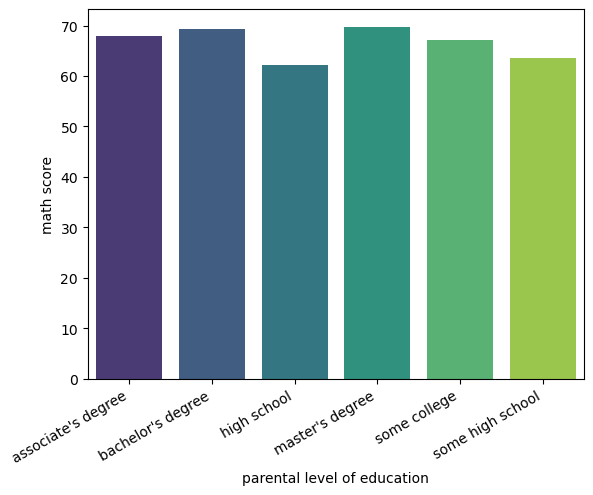

In [ ]:

sns.barplot(
    x='parental level of education',
    y='math score',
    data=mean_grades,
    palette='viridis'
)
plt.xticks(rotation=30, ha='right')
plt.show()
plt.close()

C:\Users\darwi\AppData\Local\Temp\ipykernel_25356\1707209257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


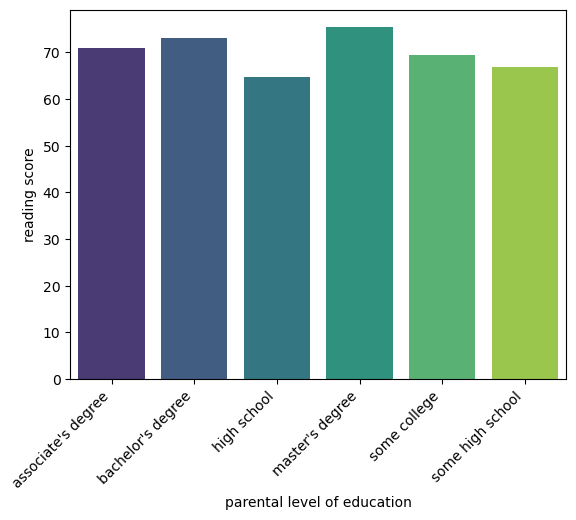

In [29]:
sns.barplot(
    x='parental level of education',
    y='reading score',
    data=mean_grades,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()

C:\Users\darwi\AppData\Local\Temp\ipykernel_25356\796356348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


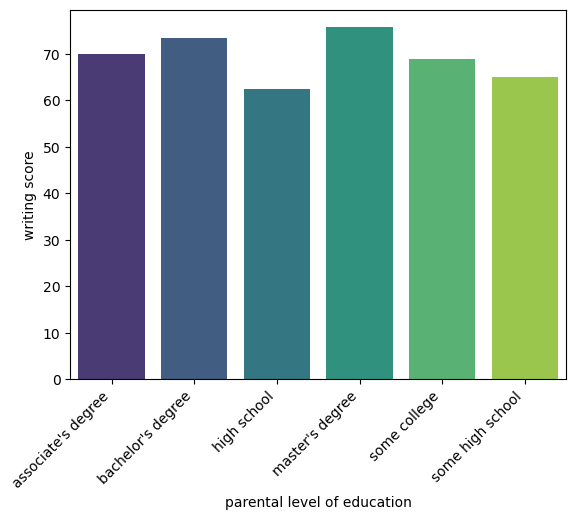

In [30]:
sns.barplot(
    x='parental level of education',
    y='writing score',
    data=mean_grades,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()

In [42]:
encoded_parental = pd.get_dummies(mean_grades, columns=["parental level of education"], drop_first=True)
print(encoded_parental)
encoded_parental_math = encoded_parental.drop(columns=['writing score', 'reading score'])
encoded_parental_reading = encoded_parental.drop(columns=['math score', 'writing score'])
encoded_parental_writing = encoded_parental.drop(columns=['math score', 'reading score'])
# Calculate correlation matrix
correlation_matrix_writing = encoded_parental_writing.corr()
correlation_matrix_reading = encoded_parental_reading.corr()
correlation_matrix_math = encoded_parental_math.corr()


# Display correlation matrix
print(correlation_matrix_writing)
print(correlation_matrix_reading)
print(correlation_matrix_math)


   math score  reading score  writing score  \
0   67.882883      70.927928      69.896396   
1   69.389831      73.000000      73.381356   
2   62.137755      64.704082      62.448980   
3   69.745763      75.372881      75.677966   
4   67.128319      69.460177      68.840708   
5   63.497207      66.938547      64.888268   

   parental level of education_bachelor's degree  \
0                                          False   
1                                           True   
2                                          False   
3                                          False   
4                                          False   
5                                          False   

   parental level of education_high school  \
0                                    False   
1                                    False   
2                                     True   
3                                    False   
4                                    False   
5                            

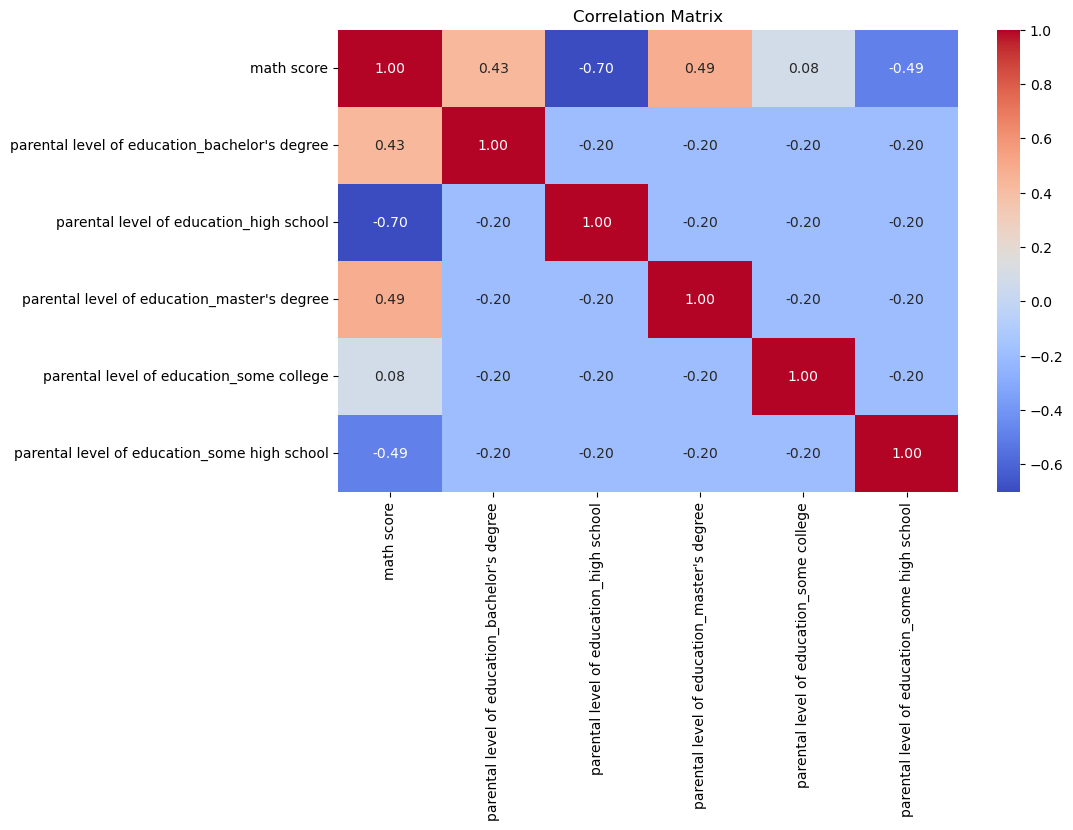

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_math, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

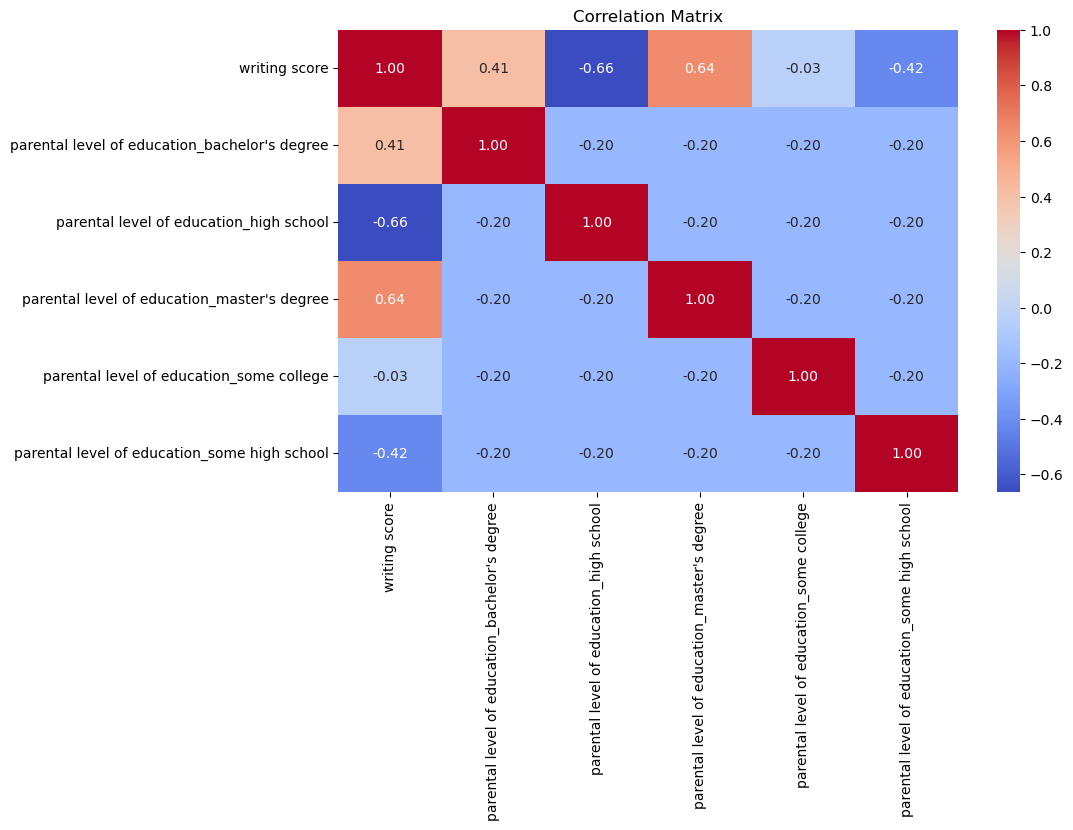

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_writing, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


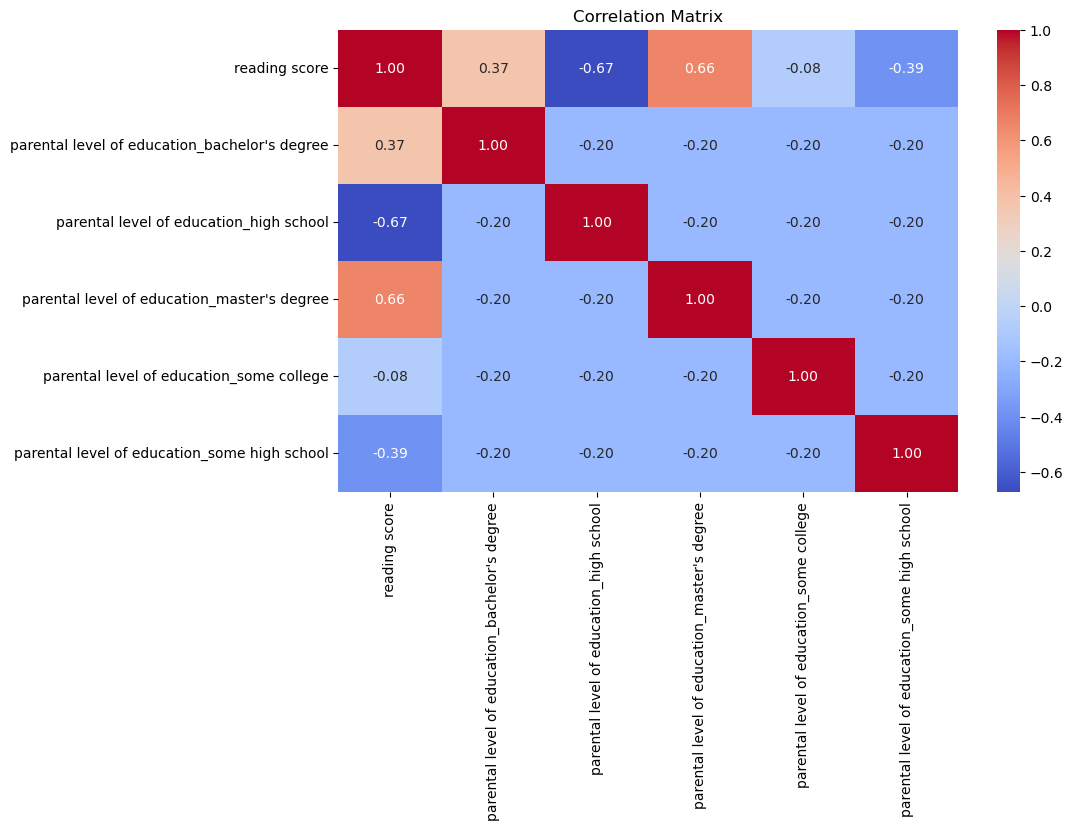

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_reading, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Generating Samples to create an ANOVA study. 

The reason we are creating a sample is beacuase there is difference between the population size. We will be creating samples with a size of 100, knowing that the recommended si +30, but to ensure less variance we are taking 100 pero each

In [107]:
sample_df = students_performance.groupby("parental level of education").sample(n=55, random_state=42)
samplel_df_principal_columns = sample_df[['parental level of education', 'math score', 'reading score', 'writing score']]
ohe = pd.get_dummies(samplel_df_principal_columns, columns=["parental level of education"], drop_first=True)
print(ohe)

     math score  reading score  writing score  \
664          80             63             63   
955          72             57             62   
48           57             74             76   
738          81             71             73   
678          81             75             78   
..          ...            ...            ...   
188          48             52             45   
278          65             86             80   
336          76             70             69   
654          73             79             79   
854          62             64             55   

     parental level of education_bachelor's degree  \
664                                          False   
955                                          False   
48                                           False   
738                                          False   
678                                          False   
..                                             ...   
188                              

In [112]:
math_sample = ohe.drop(columns=['writing score', 'reading score'])
writing_sample = ohe.drop(columns=['math score', 'reading score'])
reading_sample = ohe.drop(columns=['math score', 'writing score'])

math_corr_sample = math_sample.corr()
writing_corr_sample = writing_sample.corr()
reading_corr_sample = reading_sample.corr()


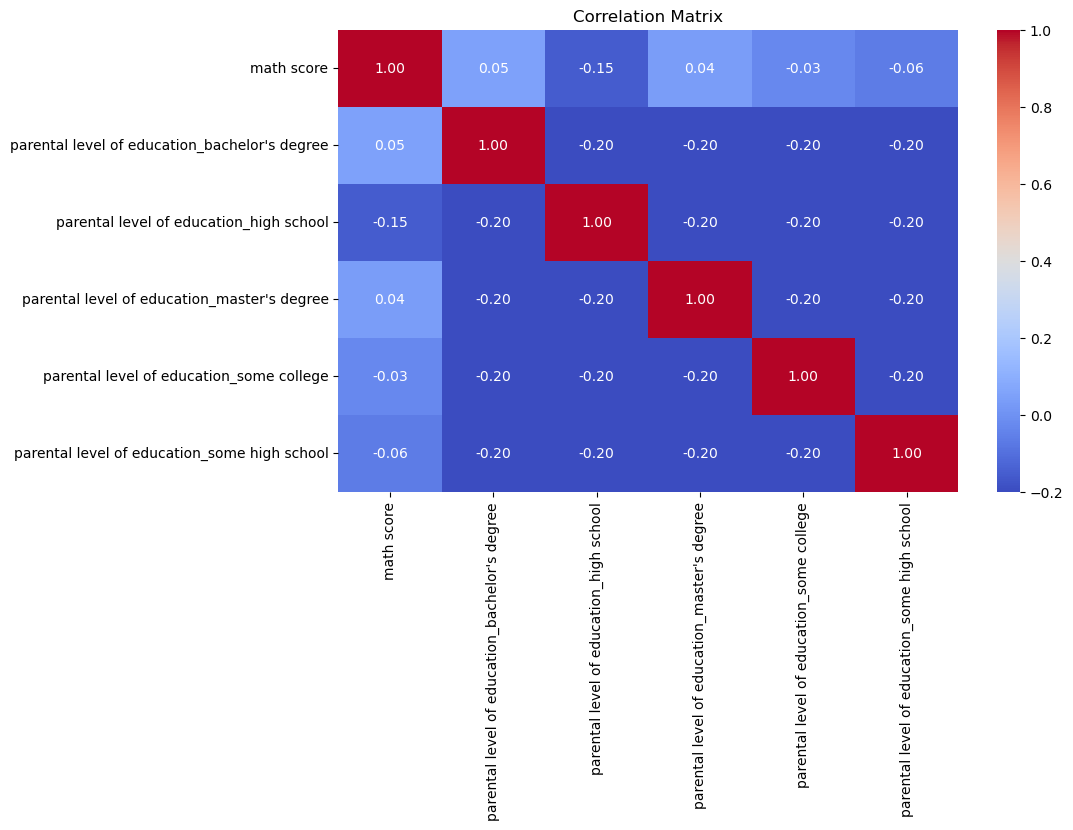

In [109]:
plt.figure(figsize=(10,6))
sns.heatmap(math_corr_sample, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

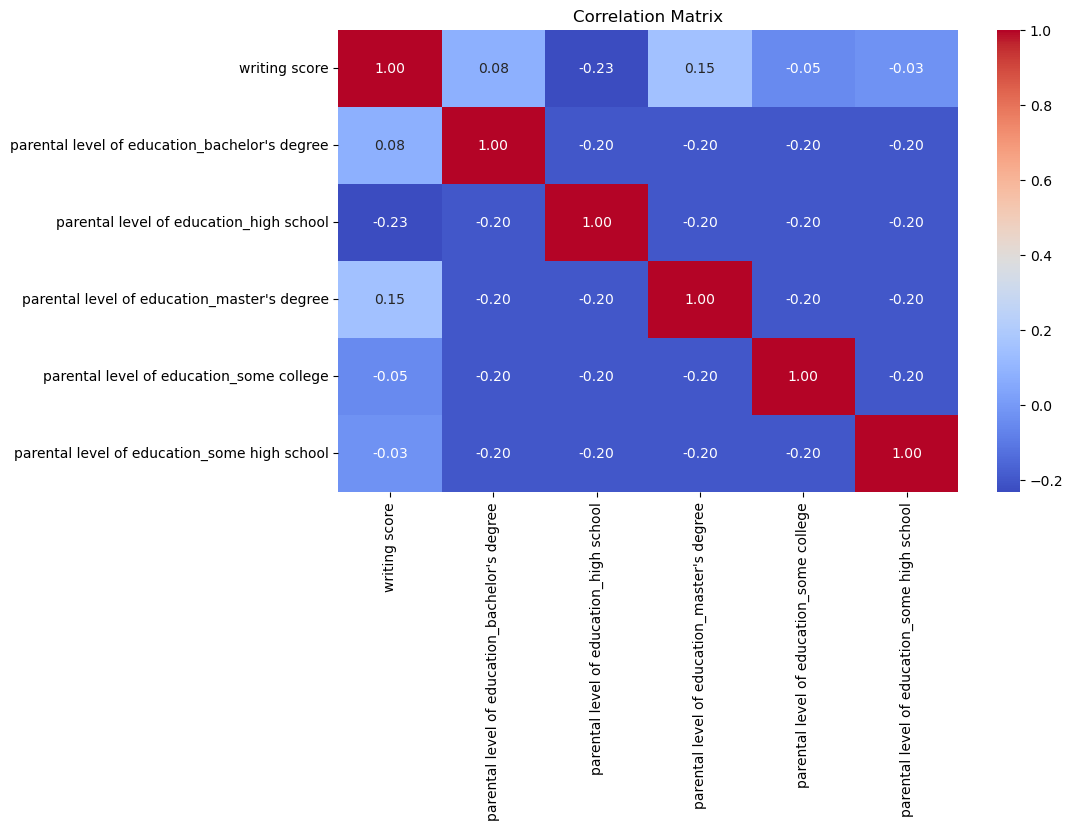

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(writing_corr_sample, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

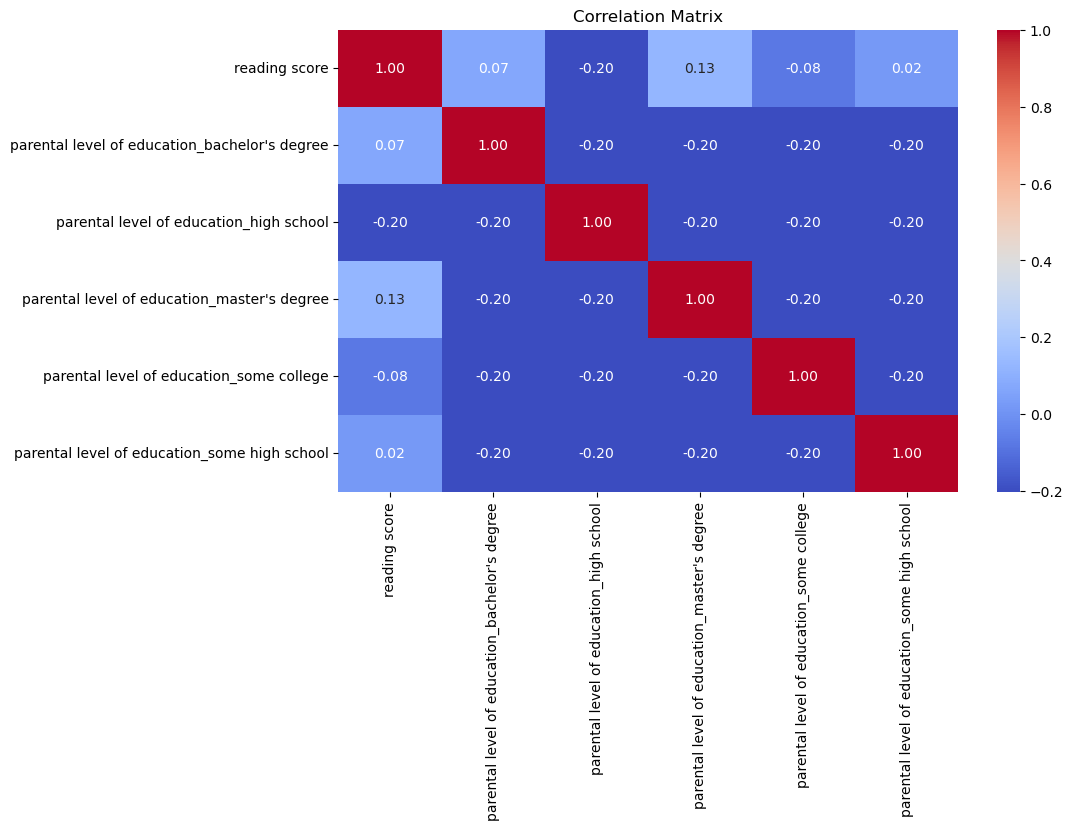

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(reading_corr_sample, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()